In [1]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

# Astro_ML

## 0. Project Intro

### Astrology 101

#### Zodiac Signs
The zodiac is a circle of 12 divisions/ signs, each named after a constellation that the Sun passes through during its annual path around the Earth. These signs are Aries, Taurus, Gemini, Cancer, Leo, Virgo, Libra, Scorpio, Sagittarius, Capricorn, Aquarius, and Pisces. 

#### Horoscopes
Astrologers use the positions of the planets and stars at a specific time, such as a person's birth, to create a chart or map of the heavens. This chart is then used to create a horoscope, which is a prediction of future events and personality traits based on the positions of the planets and stars.

#### Planets
In astrology, each planet has a specific meaning and influences different aspects of life.

#### Houses
The horoscope chart is divided into 12 houses, each of which represents a different area of life, such as career, home, and relationships.

#### Aspects
Aspects refer to the angles between planets in the horoscope chart. Different aspects have different meanings and can affect how the planets influence each other.


#### ... tbc ...

#### ...

## 1. Data

MAIN url = https://famouspeople.astro-seek.com

- an 'astro' database of 94.670 celebrity data incl. birth date, birth time (not all), signs, planets info, and birth chart

In [2]:
birth_chart_url='https://horoscopes.astro-seek.com/horoscope-chart1-700__radix_birth_chart_alois-treindl.png?fortune_asp=1&fortune_seda=0&uzel_asp=1&minor_150=on&minor_150=on&no_domy=0&dum_1=56.529069546001&dum_2=80.773444259698&dum_3=99.319819792927&dum_4=118.22578716071&dum_5=142.39126895373&dum_6=180.5408825612&&planeta_slunce=346.19472825483&planeta_luna=205.92016813298&planeta_merkur=329.0653244531&planeta_venuse=306.9236565911&planeta_mars=187.63655755145&planeta_jupiter=321.83792659518&planeta_saturn=166.03995273144&planeta_uran=90.940388417369&planeta_neptun=196.76850587785&planeta_pluto=136.34343983432&planeta_uzel=8.652459366394&planeta_lilith=36.028327337436&planeta_chiron=261.20755464715&r_mars=ANO&r_saturn=ANO&r_uran=ANO&r_neptun=ANO&r_pluto=ANO&r_uzel=ANO&planeta_fortune=276.25450942416&house_system=placidus&&narozeni_den=7&narozeni_mesic=3&narozeni_rok=1950&narozeni_hodina=09&narozeni_minuta=15&narozeni_mesto_hidden=Regensburg&narozeni_stat_hidden=DE&narozeni_podstat_kratky_hidden=Germany&narozeni_city=Regensburg&narozeni_sirka_stupne=49&narozeni_sirka_minuty=1&narozeni_sirka_smer=0&narozeni_delka_stupne=12&narozeni_delka_minuty=6&narozeni_delka_smer=0&narozeni_timezone_form=&narozeni_timezone_dst_form=&&bdata=1&'
Image(url=birth_chart_url, width=300, height=300)

# Example Birth Chart created using planets corelation info

Features:
- birth year(?)
- birth date
- birth time
- occupation
- signs
- planet positions (aspects)
- houses(?)

- others e.g. elements - can be calculated if needed

## 2. Web Scraping

- python
- first attempt: scraping all people from the following indexed page

https://famouspeople.astro-seek.com/filter_date/?umrti=&asc=&narozeni_den=nezalezi&narozeni_mesic=nezalezi&narozeni_rok=&narozeni_stat=&pohlavi=&razeni=

- 474 pages to be scraped for celebrity info, incl. birth date and time and birth chart(?)

-- update Tue 07/03 - looks like full scraping will be finished today


## 3. Data Exploration - first 2000 people

In [5]:
# JSON file ==> pandas df
df = pd.read_json('../data/people/people_10.json')

# preview
df.head(30)

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,NaN,1816,politician,Male,NaN,NaN,NaN,NaN,NaN,NaN
1,Adolfh Freiherr Knigge,16,10.0,1752,05:30,Libra,6.0,11.0,12,NaN,...,NaN,1796,writer,Male,1.0,NaN,NaN,NaN,NaN,NaN
2,George Rogers Clark,19,11.0,1752,None,Sagittarius,1.0,30.0,,NaN,...,NaN,1818,general,Male,NaN,1.0,NaN,NaN,NaN,NaN
3,Thomas Chatterton,20,11.0,1752,06:14,Sagittarius,2.0,21.0,1,NaN,...,NaN,1770,"writer, poet",Male,NaN,1.0,NaN,NaN,NaN,NaN
4,Solomon Drowne,11,3.0,1753,08:00,Pisces,12.0,55.0,11,NaN,...,NaN,1834,doctor,Male,NaN,NaN,NaN,NaN,NaN,NaN
5,Benjamin Thompson,26,3.0,1753,None,Aries,12.0,45.0,,NaN,...,NaN,1814,"entrepreneur, inventor, businessman, scientist",Male,NaN,NaN,1.0,NaN,NaN,NaN
6,Franz Carl Achard,28,4.0,1753,14:00,Taurus,19.0,31.0,9,1.0,...,NaN,1821,chemist,Male,NaN,NaN,1.0,1.0,NaN,NaN
7,Lazare Carnot,13,5.0,1753,16:00,Taurus,11.0,49.0,7,1.0,...,NaN,1823,"politician, scientist general, builder",Male,NaN,NaN,1.0,1.0,NaN,NaN
8,Josef Dobrovský,17,8.0,1753,None,Virgo,21.0,28.0,,NaN,...,NaN,1829,"priest, philologist, historian, writer",Male,1.0,NaN,1.0,1.0,NaN,NaN
9,Charles Talleyrand-Perigord,2,2.0,1754,21:00,Capricorn,24.0,41.0,4,NaN,...,NaN,1838,diplomat,Male,NaN,1.0,NaN,NaN,NaN,NaN


In [6]:
# rows and columns
df.shape

(2000, 95)

In [15]:
df.dtypes

name                   object
birth_day              object
birth_month           float64
birth_year             object
birth_time             object
                       ...   
jupiter_retrograde    float64
pluto_retrograde      float64
saturn_retrograde     float64
venus_retrograde      float64
mars_retrograde       float64
Length: 95, dtype: object

In [8]:
df.dtypes.value_counts()

float64    55
object     40
dtype: int64

In [7]:
# double check type with examples
df['birth_year'].dtype, df['birth_month'].dtype

(dtype('O'), dtype('float64'))

In [9]:
# check columns
df.columns

Index(['name', 'birth_day', 'birth_month', 'birth_year', 'birth_time',
       'mercury_sign', 'mercury_pos_degrees', 'mercury_pos_minutes',
       'mercury_house', 'mercury_retrograde', 'venus_sign',
       'venus_pos_degrees', 'venus_pos_minutes', 'venus_house', 'mars_sign',
       'mars_pos_degrees', 'mars_pos_minutes', 'mars_house', 'sun_sign',
       'sun_pos_degrees', 'sun_pos_minutes', 'sun_house', 'moon_sign',
       'moon_pos_degrees', 'moon_pos_minutes', 'moon_house', 'jupiter_sign',
       'jupiter_pos_degrees', 'jupiter_pos_minutes', 'jupiter_house',
       'saturn_sign', 'saturn_pos_degrees', 'saturn_pos_minutes',
       'saturn_house', 'uranus_sign', 'uranus_pos_degrees',
       'uranus_pos_minutes', 'uranus_house', 'neptune_sign',
       'neptune_pos_degrees', 'neptune_pos_minutes', 'neptune_house',
       'neptune_retrograde', 'pluto_sign', 'pluto_pos_degrees',
       'pluto_pos_minutes', 'pluto_house', 'house_AC_sign',
       'house_AC_pos_degrees', 'house_AC_pos_minute

In [10]:
# missing values count
df.isnull().sum()

name                     0
birth_day                0
birth_month              2
birth_year               0
birth_time             407
                      ... 
jupiter_retrograde    1407
pluto_retrograde      1208
saturn_retrograde     1294
venus_retrograde      1875
mars_retrograde       1809
Length: 95, dtype: int64

In [11]:
# columns with over 1000 missing values
df.isnull().sum().loc[df.isnull().sum() > 1000].index.tolist() 

['mercury_retrograde',
 'neptune_retrograde',
 'death_cause',
 'death_month',
 'uranus_retrograde',
 'jupiter_retrograde',
 'pluto_retrograde',
 'saturn_retrograde',
 'venus_retrograde',
 'mars_retrograde']

In [12]:
# gender by count
df['gender'].value_counts()

Male      1745
Female     226
Name: gender, dtype: int64

In [13]:
Image(url='https://cdn-img.scalabs.com.au/uzjYWz5uFA99H9ilh_BLtPqAA1Dq0GhZ05-Iow7qAZM/aHR0cHM6Ly9zdy1o/aXQtcHJkLnNjYWRp/Z2l0YWwuaW8vbWVk/aWEvMTYyNjYvc2lk/ZS1leWUtY2hsb2Uu/anBnP3ByZXNldD1N/YWluSW1hZ2U')

In [24]:
# exploring cause of death
df['death_cause'].value_counts()

Disease                      89
Tuberculosis                 41
Cancer                       40
Stroke                       32
Pneumonia                    31
Heart Attack                 28
Syphilis                     17
Accident                     17
Suicide                      15
Murder by Gunshot            13
Fever                        12
Heart Failure                10
Murder                        9
Kidney Failure                8
Execution by Beheading        6
Influenza                     5
Execution by Hanging          5
Injury                        5
Suicide by Gunshot            5
Diabetes                      5
Car Accident                  5
Execution by Gunshot          4
Unclear cause                 4
Brain Failure                 3
Respiratory/Lung Failure      3
Cirrhosis                     3
Multiple Sclerosis            3
Drowning                      3
Victims of Assassination      3
Train Accident                2
Suicide by Hanging            2
Suicide 

In [25]:
# top 10 professions
top_professions = df['occupation'].value_counts().nlargest(10).index.tolist()
top_professions

['writer',
 'painter',
 'composer',
 'politician',
 'writer, poet',
 'actor',
 'physicist',
 'poet',
 'architect',
 'philosopher']

In [26]:
# filtered df to include only top 10 professions
df_top = df[df['occupation'].isin(top_professions)]
df_top

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,NaN,1816,politician,Male,NaN,NaN,NaN,NaN,NaN,NaN
1,Adolfh Freiherr Knigge,16,10.0,1752,05:30,Libra,6.0,11.0,12,NaN,...,NaN,1796,writer,Male,1.0,NaN,NaN,NaN,NaN,NaN
3,Thomas Chatterton,20,11.0,1752,06:14,Sagittarius,2.0,21.0,1,NaN,...,NaN,1770,"writer, poet",Male,NaN,1.0,NaN,NaN,NaN,NaN
13,George Crabbe,24,12.0,1754,16:00,Sagittarius,11.0,4.0,6,NaN,...,NaN,1832,"writer, poet",Male,NaN,NaN,NaN,NaN,NaN,NaN
19,Hans Axel von Fersen,4,9.0,1755,None,Leo,29.0,32.0,,NaN,...,NaN,1810,politician,Male,1.0,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,Josef Javorčák,6,1.0,1862,None,Capricorn,12.0,26.0,,NaN,...,NaN,1927,actor,Male,1.0,NaN,1.0,1.0,NaN,NaN
1994,Ernest Bozzano,9,1.0,1862,04:08,Capricorn,16.0,47.0,2,NaN,...,NaN,None,writer,Male,1.0,NaN,1.0,1.0,NaN,NaN
1997,Frederick Delius,29,1.0,1862,09:00,Aquarius,21.0,10.0,12,NaN,...,NaN,1934,composer,Male,1.0,1.0,NaN,1.0,NaN,NaN
1998,Édouard Estaunié,4,2.0,1862,01:00,Pisces,0.0,39.0,4,NaN,...,NaN,1942,writer,Male,1.0,1.0,NaN,1.0,NaN,NaN


<AxesSubplot: xlabel='occupation', ylabel='count'>

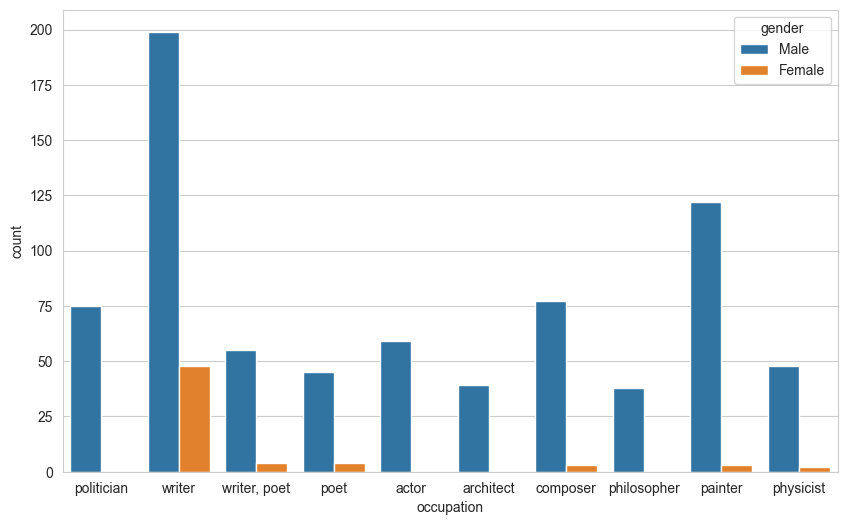

In [27]:
# bar plot of top 10 professions and gender counts for each

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=df_top, x='occupation', hue='gender')

In [28]:
# quick birth_year column cleaning

df = df[df['birth_year'] != ''] # remove rows with no birth year

df['birth_year'] = df['birth_year'].astype(int) # convert to int
df['birth_year'].dtype

dtype('int64')

In [33]:
# filter the df to include only rows with birth year >= threshold (1899)
df_filtered = df[df['birth_year'] > 1899]
df_filtered

# will work with complete df (json)

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde


In [34]:
# top 10 professions - after 1899
top_professions = df_filtered['occupation'].value_counts().nlargest(10).index.tolist()
top_professions

# will work with complete df (json)

[]

In [35]:
# filtered df with top 10 professions only - after 1899
df_top_filter = df_filtered[df_filtered['occupation'].isin(top_professions)]
df_top_filter

# will work with complete df (json)

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde


In [36]:
# bar plot of top 10 professions and gender counts - after 1899

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=df_top_filter, x='occupation', hue='gender')

# will work with complete df (json)

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

#### Challenges
- website structure
- scraping time
- time of birth missing for some entries - to be detarmined how many

### API for missing data

Wikidata Query Service
- to be executed on https://query.wikidata.org/
- used to retrive missing info such as cause of death

In [5]:
SELECT ?item ?itemLabel ?itemDescription ?dateOfBirth ?dateOfDeath ?causeOfDeathLabel WHERE {
  ?item wdt:P31 wd:Q5.
  ?item ?label "Albert Einstein"@en.
  ?article schema:about ?item .
  ?article schema:inLanguage "en" .
  ?article schema:isPartOf <https://en.wikipedia.org/>.
  OPTIONAL {?item wdt:P569 ?dateOfBirth.}
  OPTIONAL {?item wdt:P570 ?dateOfDeath.}
  OPTIONAL {
    ?item p:P509 ?causeOfDeathStatement.
    ?causeOfDeathStatement ps:P509 ?causeOfDeath.
    ?causeOfDeath rdfs:label ?causeOfDeathLabel.
    FILTER(LANG(?causeOfDeathLabel) = "en").
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }  
}

SyntaxError: invalid syntax (3403525930.py, line 1)

Example output for Albert Einstein:
- item: wd:Q937
- itemLabel: Albert Einstein
- itemDescription: German-born theoretical physicist; developer of the theory of relativity (1879–1955)
- dateOfBirth: 14 March 1879
- dateOfDeath: 18 April 1955
- causeOfDeathLabel: abdominal aortic aneurysm

- no

##### Older scraping tests

In [7]:
query = 'Albert Einstein'

url = 'https://en.wikipedia.org/w/api.php'
params = {
    'action': 'query',
    'format': 'json',
    'list': 'search',
    'utf8': 1,
    'srsearch': query
}

response = requests.get(url, params=params).json()

for result in response['query']['search']:
    title = result['title']
    word_count = result['wordcount']
    print(f"{title} - Word count: {word_count}")


Albert Einstein - Word count: 20265
Einstein family - Word count: 3742
Hans Albert Einstein - Word count: 1174
Albert Einstein's brain - Word count: 2568
Albert Brooks - Word count: 1912
Religious and philosophical views of Albert Einstein - Word count: 9949
Albert Einstein College of Medicine - Word count: 2648
Political views of Albert Einstein - Word count: 6462
Albert Einstein (disambiguation) - Word count: 492
Albert Einstein Memorial - Word count: 993


# 4. Data Cleaning

# 5. ...